In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz , butter, impulse, impulse2 , filtfilt, find_peaks, lfilter,impulse,hilbert, unit_impulse


<ipython-input-58-17609be04199>:11: RuntimeWarning: divide by zero encountered in log10
  absolute_of_G_dB = 20*np.log10(absolute_of_G)
<ipython-input-58-17609be04199>:26: RuntimeWarning: divide by zero encountered in log10
  G_full_mag_dB = 20*np.log10(G_full_mag)


Fsc :112.03889655172415
Vab :0.0030001426940639265
Qtc :0.7048
Vab_10percent :0.003300156963470319
Vab_10percent_cm3 :3000.1426940639267


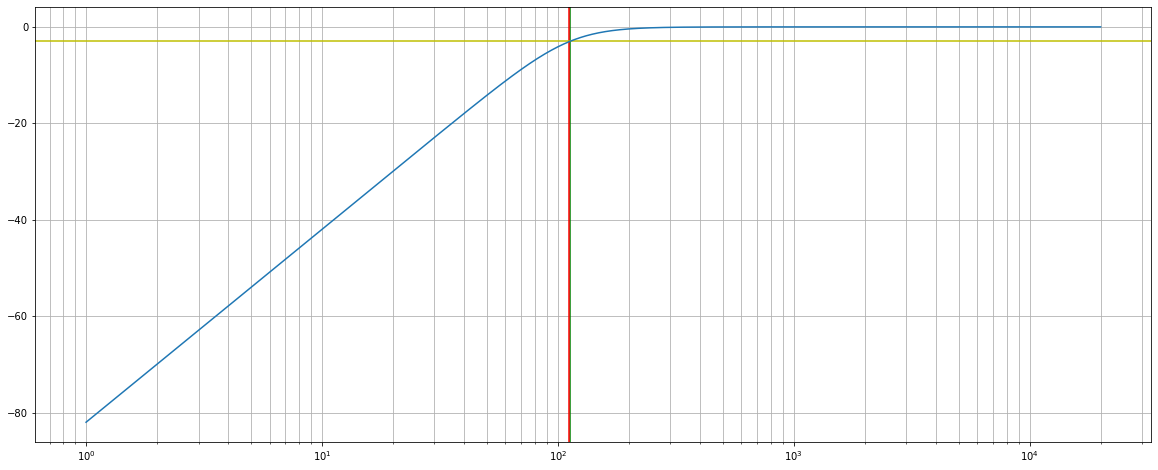

In [58]:
#Frequency Respose Murphy 2012



def G(f , Vas, Vab , Fs , f3, Fsc):
    alpha = Vas/ Vab 
    fn = f / Fs
    a2 = 1 + alpha
    a3 = 1/ Qts
    absolute_of_G =  fn**2 / ( np.sqrt(fn**4 + (a3**2  - 2*a2)*fn**2 + a2**2))
    absolute_of_G_dB = 20*np.log10(absolute_of_G)
    
    
    plt.figure(figsize = (20,8))
    plt.grid(which = 'both')
    plt.axvline(f3, color='green') # cutoff frequency
    plt.axvline(Fsc, color='red')
    plt.axhline(y= -3 , xmin=0, xmax=1, color = 'y')
    plt.semilogx(f,absolute_of_G_dB)
    
    return absolute_of_G

def G_Full(f , Qtc, Fsc):
    G_full = (f/Fsc)**2 / ((f/Fsc)**2 - 1j*((f/Fsc)/Qtc) -1)
    G_full_mag = np.abs(G_full)
    G_full_mag_dB = 20*np.log10(G_full_mag)
    
#     plt.figure(figsize = (20,8))
#     plt.grid(which = 'both')
#     plt.axvline(f3, color='green') # cutoff frequency
#     plt.axvline(Fsc, color='red')
#     plt.axhline(y= -3 , xmin=0, xmax=1, color = 'y')
#     plt.semilogx(f,G_full_mag_dB)
    return G_full



    

#Design input
Fs = 92.2 #Hz
Qts= 0.58
Vas = 1.43 * 0.001 # m^3

#additional Define Qtc
Qtc = 0.7048   #0.7048



#OUTPUT 
Fsc = (Qtc * Fs) / Qts #frequency cutoff
Vab =  Vas / (((Qtc / Qts)**2) - 1 ) 
f3 =  Fsc * np.sqrt( ((1/(2*Qtc**2))-1)   + np.sqrt( ((1/(2*Qtc**2)) - 1)**2  +1))
f = np.arange(0,20000,1)

absolute_of_G = G(f, Vas, Vab, Fs, f3, Fsc)
G_full = G_Full(f , Qtc, Fsc)

Vab_10percent = (Vab * (10/100)) +Vab

Vab_10percent_cm3 = Vab * 1000000

# G_Full(f , Qtc, Fsc)

print("Fsc :{}".format(Fsc))
print("Vab :{}".format(Vab))
print("Qtc :{}".format(Qtc))
print("Vab_10percent :{}".format(Vab_10percent))
print("Vab_10percent_cm3 :{}".format(Vab_10percent_cm3))

#try to get impulse response




In [59]:
# circle 

#100 % = 28 cm , Speaker min 9 cm
diameter_of_circle = 16 #cm
radius = diameter_of_circle / 2 

print("diameter_of_circle :{}".format(diameter_of_circle))
print("radius :{}".format(radius))


volume_of_circle = (4/3) * np.pi * radius**3 

print("volume_of_circle :{}".format(volume_of_circle))

Ting_volume = Vab_10percent_cm3  - volume_of_circle

print("Ting_volume :{}".format(Ting_volume))

radius_length = 12
radius_width = 7

radius_height = Ting_volume * 3 / (4 * np.pi * radius_width  * radius_length )


print("radius_height :{}".format(radius_height))
print("radius_width :{}".format(radius_width))
print("radius_length :{}".format(radius_length))



print("height :{}".format(radius_height*2))
print("width :{}".format(radius_width*2))
print("length :{}".format(radius_length*2))







diameter_of_circle :16
radius :8.0
volume_of_circle :2144.660584850632
Ting_volume :855.4821092132947
radius_height :2.431325114428152
radius_width :7
radius_length :12
height :4.862650228856304
width :14
length :24


In [78]:
imupulse_res = unit_impulse(20000)
imupulse_res_fft = np.fft.fft(imupulse_res)
imupulse_res_fft_real = imupulse_res_fft.real
imupulse_res_fft_img = imupulse_res_fft.imag
imupulse_res_fft_abs = np.abs(imupulse_res_fft)

imupulse_res_fft_filter = imupulse_res_fft * G_full

imupulse_res_filter_ifft = np.fft.ifft(imupulse_res_fft_filter)


G_full_ifft = np.fft.ifft(G_full)
xxx =np.convolve(imupulse_res,G_full_ifft)



C:\Users\Smith\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


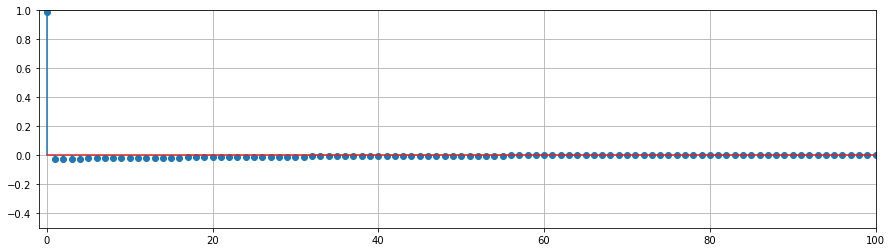

In [80]:
plt.figure(figsize = (15,4))
plt.stem(xxx)
plt.xlim([-1,100])
plt.ylim([-0.5,1])
plt.grid()